# Text Mining (Emotion Mining)

Shubham's Assignment

In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
reviewlist = []

In [4]:
def get_soup(url):
    r = requests.get(url)
    print(r.text)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in range(1,10):
    soup = get_soup(f'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-last'}):
        pass
    else:
        break

<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->

<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11fJbvhE5HL.css,01Dm

In [7]:
df = pd.DataFrame(reviewlist)
df.to_excel('rating.xlsx', index=False)
print('Fin.')

Fin.


In [8]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
import seaborn as sns
from textblob import TextBlob
from nltk import tokenize
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [11]:
data = pd.read_csv("reviews.csv",encoding = "ISO-8859-1")
data.head()

,id,profileName,text,date,title,rating,images,helpful,Style name,Colour
0,R1M3SHYTXH5XJ,Aryan Rasaily,Received this product yesterday and seriously ...,Reviewed in India ð®ð³ on 17 March 2022,Most underrated phone!!,5,NaN,6,8GB RAM + 128GB Storage,Astral Black
1,RC8V7S78LGI81,Kandarpa Bora,NaN,Reviewed in India ð®ð³ on 17 January 2023,Display problem diya hai du line Aiya hain abh...,4,https://m.media-amazon.com/images/I/71ZIjfq65i...,5,NaN,NaN
2,R1549PGT9E6W4V,Mahalakshmi Subramanian,Product is good- but green lines automatically...,Reviewed in India ð®ð³ on 24 February 2023,Green lines on mobile screen after 1.3 years- ...,3,https://m.media-amazon.com/images/I/61vVTOunb0...,4,8GB RAM + 128GB Storage,Astral Black
3,RMLA9NFF8BRF6,Ankita Singh,"Despite of all three good features, it has a l...",Reviewed in India ð®ð³ on 12 October 2022,Good phone but with glitches,4,NaN,1,8GB RAM + 128GB Storage,Astral Black
4,R1BS75BGGDOGN2,Narayanrajesh Prajapati,I don't like this Amazon saler fault i ordered...,Reviewed in India ð®ð³ on 3 November 2022,I ordered astral black but i got navey blue co...,4,https://m.media-amazon.com/images/I/71FqmLEn6N...,1,NaN,NaN


In [12]:
data.shape

(50, 10)

In [13]:
data.dtypes

id             object
profileName    object
text           object
date           object
title          object
rating          int64
images         object
helpful         int64
Style name     object
Colour         object
dtype: object

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50 non-null     object
 1   profileName  50 non-null     object
 2   text         48 non-null     object
 3   date         50 non-null     object
 4   title        50 non-null     object
 5   rating       50 non-null     int64 
 6   images       19 non-null     object
 7   helpful      50 non-null     int64 
 8   Style name   34 non-null     object
 9   Colour       34 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


<AxesSubplot:xlabel='rating', ylabel='Density'>

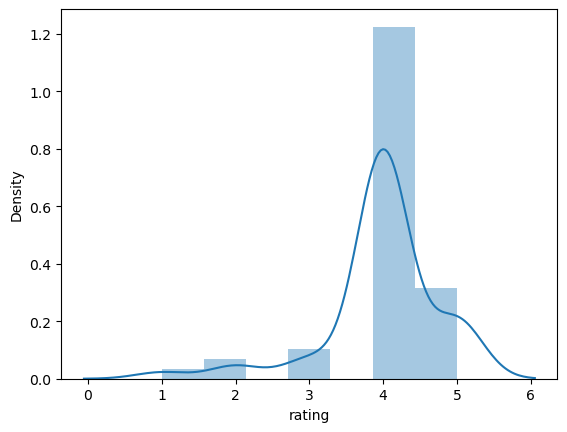

In [15]:
sns.distplot(data['rating'])

<AxesSubplot:xlabel='rating', ylabel='count'>

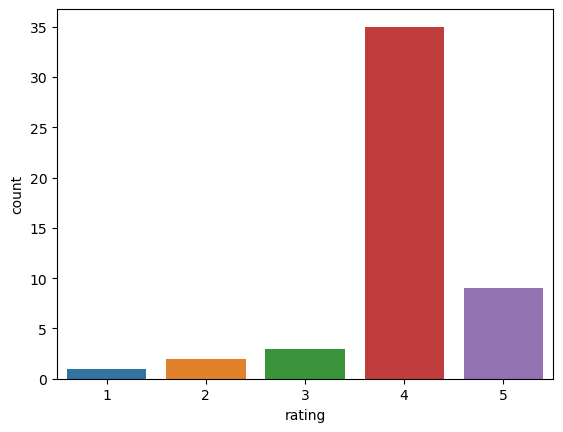

In [16]:
sns.countplot(x='rating',data=data)

In [17]:
df['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0    5.0
1    4.0
2    3.0
3    4.0
4    4.0
5    4.0
6    4.0
7    5.0
8    4.0
9    4.0
Name: rating, dtype: float64>

In [18]:
df['rating'].isnull().sum()

0

In [19]:
sid.polarity_scores(df.loc[0]['body'])

{'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'compound': 0.9745}

In [20]:
df['scores'] = df['body'].apply(lambda body: sid.polarity_scores(body))
df.head()

,product,title,rating,body,scores
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Most underrated phone!!,5.0,Received this product yesterday and seriously ...,"{'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'co..."
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Display problem diya hai du line Aiya hain abh...,4.0,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Green lines on mobile screen after 1.3 years- ...,3.0,Product is good- but green lines automatically...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp..."
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Good phone but with glitches,4.0,"Despite of all three good features, it has a l...","{'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compou..."
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",I ordered astral black but i got navey blue co...,4.0,I don't like this Amazon saler fault i ordered...,"{'neg': 0.258, 'neu': 0.59, 'pos': 0.152, 'com..."


In [21]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [22]:
df.head()

,product,title,rating,body,scores,compound,sentiment_type
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Most underrated phone!!,5.0,Received this product yesterday and seriously ...,"{'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'co...",0.9745,POSITIVE
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Display problem diya hai du line Aiya hain abh...,4.0,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Green lines on mobile screen after 1.3 years- ...,3.0,Product is good- but green lines automatically...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.2382,POSITIVE
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Good phone but with glitches,4.0,"Despite of all three good features, it has a l...","{'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compou...",0.2382,POSITIVE
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",I ordered astral black but i got navey blue co...,4.0,I don't like this Amazon saler fault i ordered...,"{'neg': 0.258, 'neu': 0.59, 'pos': 0.152, 'com...",-0.6921,NEGATIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

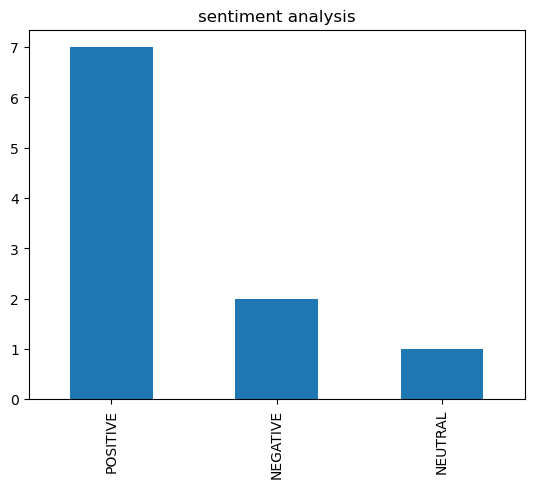

In [23]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [26]:
new_data = data.rename(columns = {"Colour": "Emotion"})
new_data.head(10)

,id,profileName,text,date,title,rating,images,helpful,Style name,Emotion
0,R1M3SHYTXH5XJ,Aryan Rasaily,Received this product yesterday and seriously ...,Reviewed in India ð®ð³ on 17 March 2022,Most underrated phone!!,5,NaN,6,8GB RAM + 128GB Storage,Astral Black
1,RC8V7S78LGI81,Kandarpa Bora,NaN,Reviewed in India ð®ð³ on 17 January 2023,Display problem diya hai du line Aiya hain abh...,4,https://m.media-amazon.com/images/I/71ZIjfq65i...,5,NaN,NaN
2,R1549PGT9E6W4V,Mahalakshmi Subramanian,Product is good- but green lines automatically...,Reviewed in India ð®ð³ on 24 February 2023,Green lines on mobile screen after 1.3 years- ...,3,https://m.media-amazon.com/images/I/61vVTOunb0...,4,8GB RAM + 128GB Storage,Astral Black
3,RMLA9NFF8BRF6,Ankita Singh,"Despite of all three good features, it has a l...",Reviewed in India ð®ð³ on 12 October 2022,Good phone but with glitches,4,NaN,1,8GB RAM + 128GB Storage,Astral Black
4,R1BS75BGGDOGN2,Narayanrajesh Prajapati,I don't like this Amazon saler fault i ordered...,Reviewed in India ð®ð³ on 3 November 2022,I ordered astral black but i got navey blue co...,4,https://m.media-amazon.com/images/I/71FqmLEn6N...,1,NaN,NaN
5,R337TCUE1JNHCK,sougat das,Great phone. But without OIS photos shake a lo...,Reviewed in India ð®ð³ on 9 November 2022,Bad camera without IOS,4,NaN,0,12GB RAM + 256GB Storage,Arctic Sky
6,RME9B2B3SMDUP,ShiKo,I was using OnePlus 5 before this and it was s...,Reviewed in India ð®ð³ on 30 September 2022,Heats up real quick!,4,NaN,0,NaN,NaN
7,R28XO8JFMNVKM,Avik Mukherjee,Note that I bought this device at around 35k w...,Reviewed in India ð®ð³ on 10 February 2022,OnePlus is still fast and smooth. Lets hope th...,5,https://m.media-amazon.com/images/I/71jtXuMNBq...,6,8GB RAM + 128GB Storage,Astral Black
8,R23DLHZFCU90PG,Neha,After using for months I am writing this revie...,Reviewed in India ð®ð³ on 12 October 2022,Greatð,4,https://m.media-amazon.com/images/I/61KttGNQRx...,1,12GB RAM + 256GB Storage,Winter Mist
9,R3KUWDZEJG55H7,Nilesh Somani,Flagship,Reviewed in India ð®ð³ on 30 November 2022,Nice,4,NaN,0,12GB RAM + 256GB Storage,Winter Mist


In [28]:
new_data['Emotion'].value_counts()

Astral Black    19
Arctic Sky       8
Winter Mist      7
Name: Emotion, dtype: int64

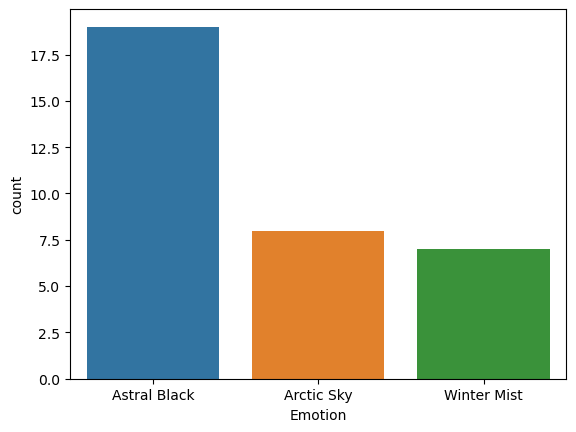

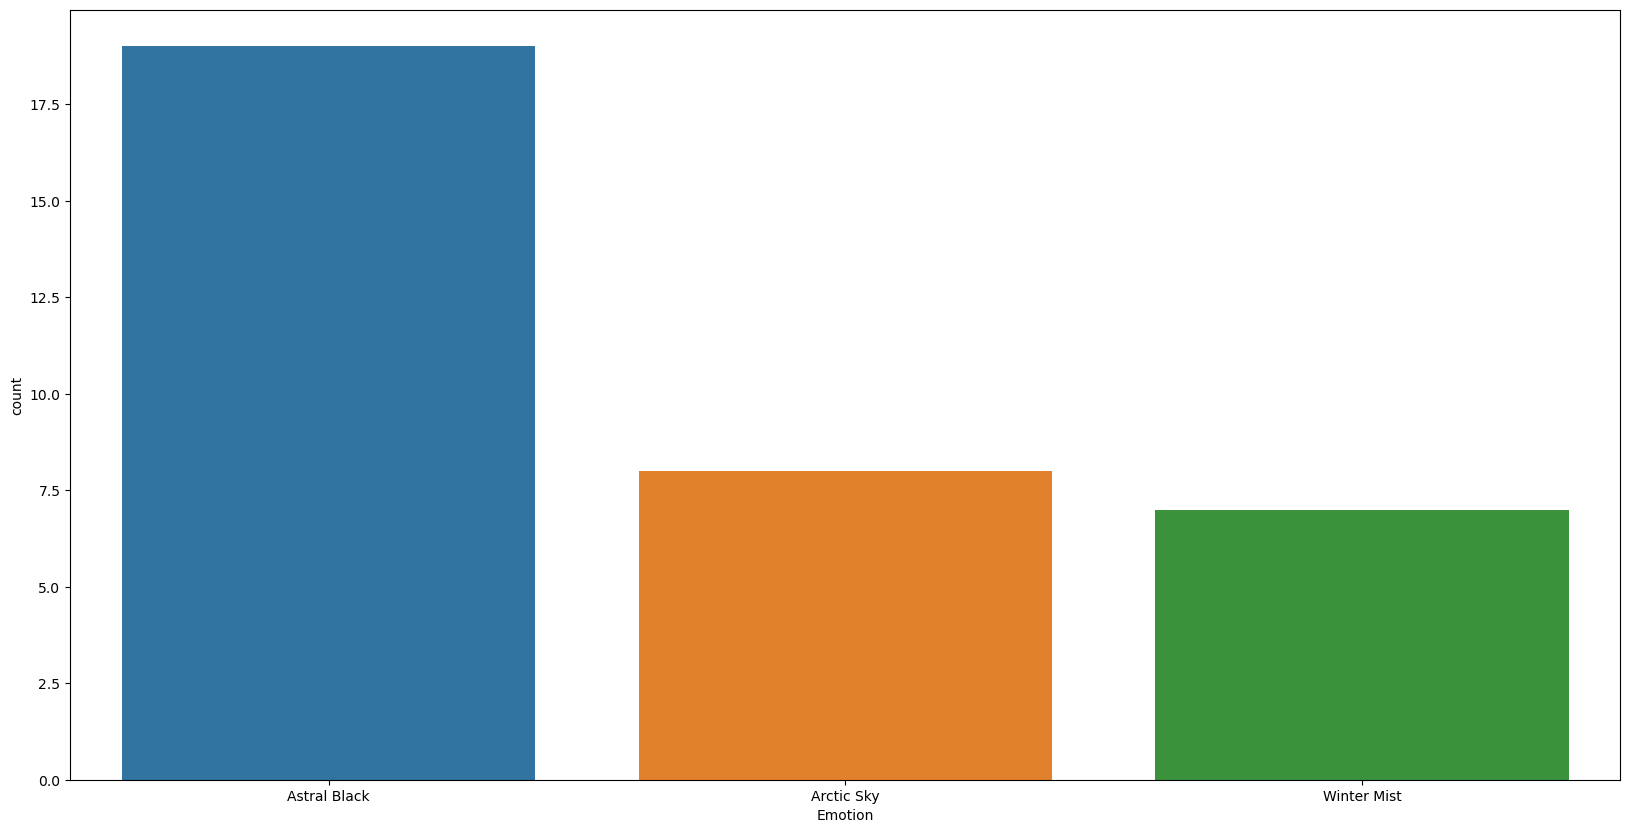

In [29]:
import matplotlib.pyplot as plt
sns.countplot(new_data['Emotion']) #old 
plt.figure(figsize=(20,10)) #new 
sns.countplot(x='Emotion', data=new_data)
plt.show()

In [31]:
# Done